#Sample OGC Requests (WMS, WCS, Evalscript)

In [ ]:
!pip install sentinelhub

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.6/245.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.8 MB/s eta 0:00:00
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6085 sha256=d543d2f344d280e7ed3fe23742ff40d40bbd7b4e6e58f7999d7b11d637d3d540
  Stored in directory: /root/.cache/pip/wheels/2f/a1/c8/543df0e8f5e824c3e92a432e32deb9cd89ae686095ee8cfcbe
Successfully built utm


In [ ]:
from sentinelhub import SHConfig
config = SHConfig()
config.instance_id = "ae446fc0-11e2-4c2c-848b-930241305244"

if config.instance_id == "":
    print("Warning! To use OGC functionality of Sentinel Hub, please configure the `instance_id`.")

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import datetime

import matplotlib.pyplot as plt
import numpy as np

from sentinelhub import CRS, BBox, DataCollection, MimeType, WcsRequest, WmsRequest, CustomUrlParam

In [ ]:
def plot_image(image, factor=1):
    """
    Utility function for plotting RGB images.
    """
    plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)

In [ ]:
betsiboka_coords_wgs84 = (79.307903, 28.092313, 79.700603, 28.49619)

In [ ]:
betsiboka_bbox = BBox(bbox=betsiboka_coords_wgs84, crs=CRS.WGS84)
wkt_string = "POLYGON((79.352951 28.435355, 79.668758 28.471577, 79.700603 28.152398, 79.348832 28.092313, 79.352951 28.435355))"
betsiboka_geometry = wkt_string

## WMS Request

In [ ]:
wms_ndvi_request = WmsRequest(
    data_collection=DataCollection.SENTINEL2_L1C,
    layer="NDVI",
    bbox=betsiboka_bbox,
    time="latest",
    width=512,
    height=856,
    custom_url_params={CustomUrlParam.GEOMETRY: betsiboka_geometry},
    config=config,
)

In [ ]:
wms_ndvi_img = wms_ndvi_request.get_data()

In [ ]:
print("Returned data is of type = %s and length %d." % (type(wms_ndvi_img), len(wms_ndvi_img)))

Returned data is of type = <class 'list'> and length 1.


In [ ]:
print(
    "Single element in the list is of type {} and has shape {}".format(
        type(wms_ndvi_img[-1]), wms_ndvi_img[-1].shape
    )
)

Single element in the list is of type <class 'numpy.ndarray'> and has shape (856, 512, 4)


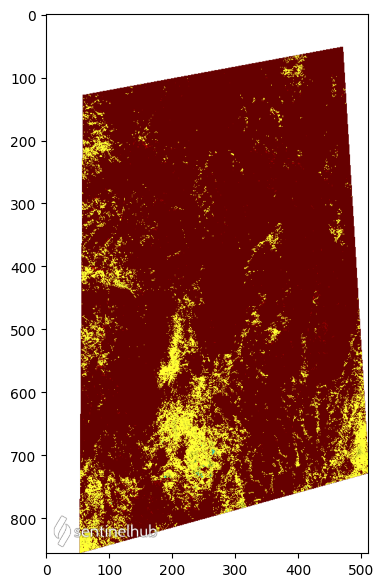

In [ ]:
plot_image(wms_ndvi_img[-1])

In [ ]:
print("This %d image were taken on the following date:" % len(wms_ndvi_img))
for index, date in enumerate(wms_ndvi_request.get_dates()):
    print(" - image %d was taken on %s" % (index, date))

This 1 image were taken on the following date:
 - image 0 was taken on 2024-07-29 05:31:03


In [ ]:
wms_msi_request = WmsRequest(
    data_collection=DataCollection.SENTINEL2_L1C,
    layer="MOISTURE-INDEX",
    bbox=betsiboka_bbox,
    time="latest",
    width=512,
    height=856,
    custom_url_params={CustomUrlParam.GEOMETRY: betsiboka_geometry},
    config=config,
)

In [ ]:
wms_msi_img = wms_msi_request.get_data()

In [ ]:
print("Returned data is of type = %s and length %d." % (type(wms_msi_img), len(wms_msi_img)))

Returned data is of type = <class 'list'> and length 1.


In [ ]:
print(
    "Single element in the list is of type {} and has shape {}".format(
        type(wms_msi_img[-1]), wms_msi_img[-1].shape
    )
)

Single element in the list is of type <class 'numpy.ndarray'> and has shape (856, 512, 4)


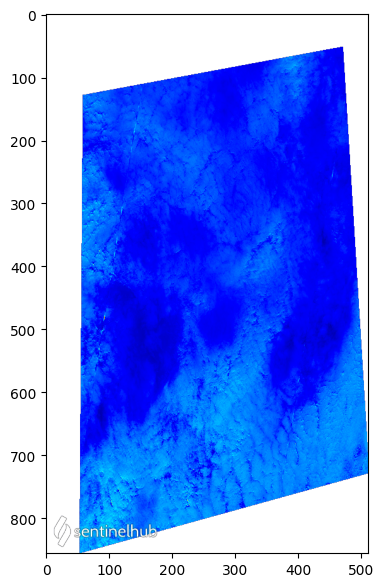

In [ ]:
plot_image(wms_msi_img[-1])

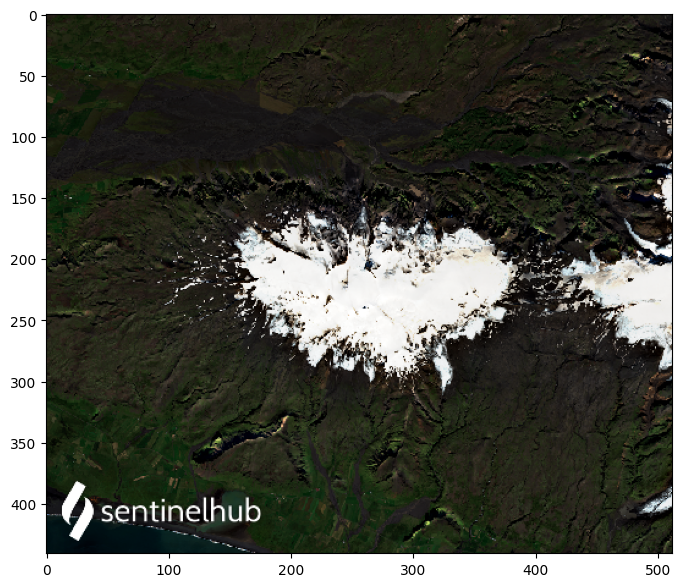

In [ ]:
volcano_bbox = BBox(bbox=(-2217485.0, 9228907.0, -2150692.0, 9284045.0), crs=CRS.POP_WEB)

l2a_request = WmsRequest(
    data_collection=DataCollection.SENTINEL2_L2A,
    layer="TRUE-COLOR-S2L2A",
    bbox=volcano_bbox,
    time="2017-08-30",
    width=512,
    config=config,
)

l2a_data = l2a_request.get_data()
plot_image(l2a_data[0])

## WCS Request

In [ ]:
wcs_ndvi_request = WcsRequest(
    data_collection=DataCollection.SENTINEL2_L1C,
    layer="NDVI",
    bbox=betsiboka_bbox,
    time="latest",
    resx="60m",
    resy="60m",
    config=config,
)

wcs_true_color_img = wcs_ndvi_request.get_data()

In [ ]:
print(
    "Single element in the list is of type = {} and has shape {}".format(
        type(wcs_true_color_img[-1]), wcs_true_color_img[-1].shape
    )
)

Single element in the list is of type = <class 'numpy.ndarray'> and has shape (1057, 624, 4)


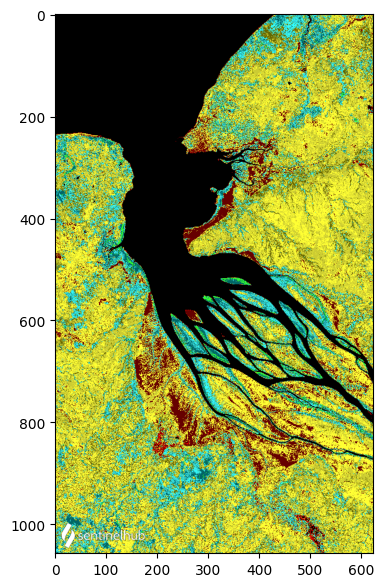

In [ ]:
plot_image(wcs_true_color_img[-1])

##Custom URL Parameters

In [ ]:
from sentinelhub import CustomUrlParam

list(CustomUrlParam)

[<CustomUrlParam.SHOWLOGO: 'ShowLogo'>,
 <CustomUrlParam.EVALSCRIPT: 'EvalScript'>,
 <CustomUrlParam.EVALSCRIPTURL: 'EvalScriptUrl'>,
 <CustomUrlParam.PREVIEW: 'Preview'>,
 <CustomUrlParam.QUALITY: 'Quality'>,
 <CustomUrlParam.UPSAMPLING: 'Upsampling'>,
 <CustomUrlParam.DOWNSAMPLING: 'Downsampling'>,
 <CustomUrlParam.GEOMETRY: 'Geometry'>,
 <CustomUrlParam.MINQA: 'MinQA'>]

In [ ]:
custom_wms_request = WmsRequest(
    data_collection=DataCollection.SENTINEL2_L1C,
    layer="TRUE-COLOR-S2L2A",
    bbox=betsiboka_bbox,
    time="latest",
    width=512,
    height=856,
    custom_url_params={CustomUrlParam.SHOWLOGO: True},
    config=config,
)

custom_wms_data = custom_wms_request.get_data()

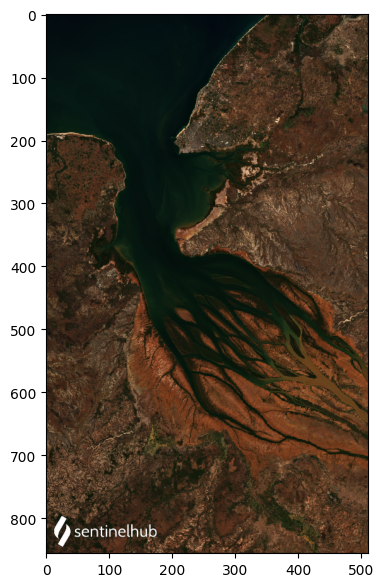

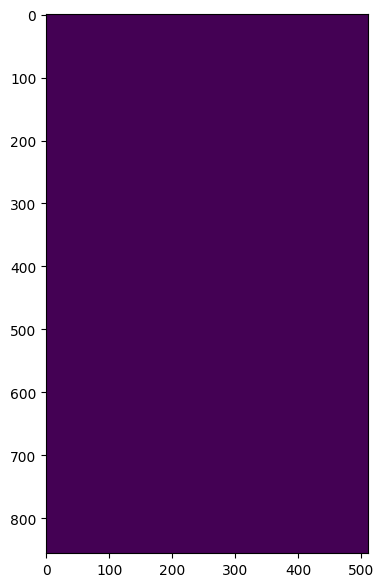

In [ ]:
plot_image(custom_wms_data[-1][:, :, :3])
plot_image(custom_wms_data[-1][:, :, 3])

##Evalscript

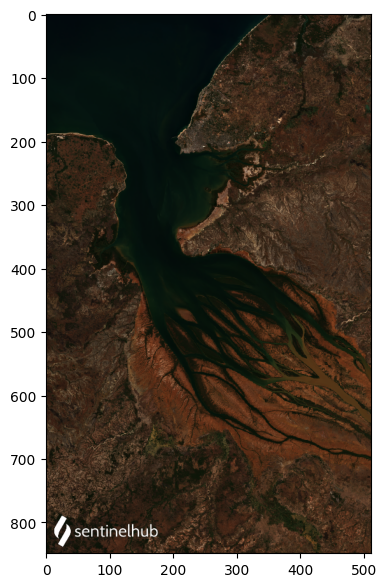

In [ ]:
my_evalscript = """
var bRatio = (B01 - 0.175) / (0.39 - 0.175);
var NGDR = (B01 - B02) / (B01 + B02);

function clip(a) {
    return a>0 ? (a<1 ? a : 1) : 0;
}

if (bRatio > 1) {
    var v = 0.5*(bRatio - 1);
    return [0.5*clip(B04), 0.5*clip(B03), 0.5*clip(B02) + v];
}

if (bRatio > 0 && NGDR > 0) {
    var v = 5 * Math.sqrt(bRatio * NGDR);
    return [0.5 * clip(B04) + v, 0.5 * clip(B03), 0.5 * clip(B02)];
}

return [2*B04, 2*B03, 2*B02];
"""

evalscript_wms_request = WmsRequest(
    data_collection=DataCollection.SENTINEL2_L1C,
    layer="TRUE-COLOR-S2L2A",
    bbox=betsiboka_bbox,
    time="latest",
    width=512,
    custom_url_params={CustomUrlParam.EVALSCRIPT: my_evalscript},
    config=config,
)

evalscript_wms_data = evalscript_wms_request.get_data()
plot_image(evalscript_wms_data[0])

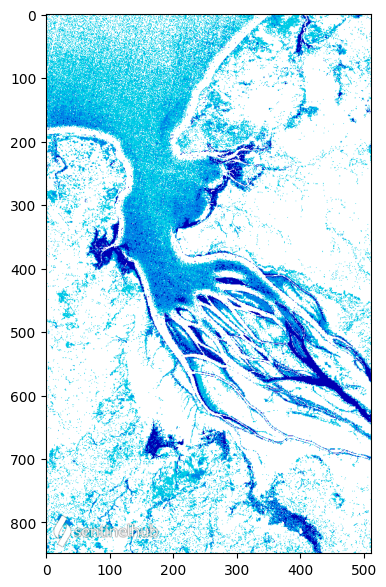

In [ ]:
my_url = "https://raw.githubusercontent.com/sentinel-hub/custom-scripts/master/sentinel-2/ndmi_special/script.js"

evalscripturl_wms_request = WmsRequest(
    data_collection=DataCollection.SENTINEL2_L1C,
    layer="TRUE-COLOR-S2L2A",
    bbox=betsiboka_bbox,
    time="latest",
    width=512,
    custom_url_params={CustomUrlParam.EVALSCRIPTURL: my_url},
    config=config,
)

evalscripturl_wms_data = evalscripturl_wms_request.get_data()
plot_image(evalscripturl_wms_data[0])